<h2>Logistic Regression</h2><br/>




<h2>1. Prerequisites</h2>

<h3>1.1. The sigmoid function</h3><br/>
Observe the shape of the sigmoid function:

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

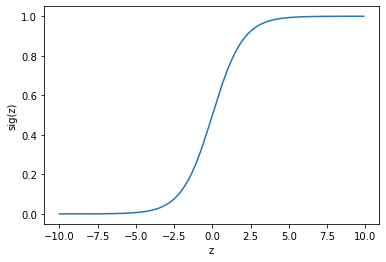

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z_n = np.arange(-10,10,step=0.1)
sig_z = 1/(1+np.exp(-z_n))

plt.figure()
plt.plot(z_n,sig_z)
plt.xlabel('z')
plt.ylabel('sig(z)')
plt.show()

Note!!! The function output values $sig(z)$ are bounded between 0 and 1.

<h3>1.2. A Probabilistic view of classification</h3>

``<b>Classification is the task of choosing a value of y that maximises P(Y|X)</b>". <br/><br/>Let's look at the datasets of 'health-diabetes' supplied in class.

In [2]:
import pandas as pd

df = pd.read_csv('../datasets/Healthcare-Diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Given a customer profile $x=[pregrancies=5, glucose=148, bloodPressure=72, ..., Age=43]$, what is the probability of

$$P(Y=1|X=x) = ?$$

and

$$P(Y=0|X=x) = ?$$

$$P(Y=1|X=x) = 1 - P(Y=0|X=x)$$

In [3]:
;

''

If $P(Y=1|X=x)=0.76$ and consequently $P(Y=0|X=x)=0.24$, we will conclude that the current profile shows a strong indication that the person <b>has diabetes</b>.

Alternatively, if $P(Y=1|X=x)=0.36$ and consequently $P(Y=0|X=x)=0.64$, we will conclude that the current profile shows a strong indication that the person <b>does not have diabetes</b>.

So, then classification is the task of estimating the probability distribution <br/><br/> $$P(Y=1|X=x) = f(\theta,x)$$  <br/>such that for any profile we can estimate the probability $p = P(Y=1|X=x) = f(\theta,x) $,<br/><br/> and tells whether the class for the input feature $x$ is y=1 ($p \geq 0.5$) or y=0 ($p < 0.5$).

<h2>2. Logistic regression: Concept</h2>

 Logistic regression is a classification algorithm that works by trying to learn a function that approximates P(Y|X)

It makes the assumption that P(Y|X) can be <b>approximated as a sigmoid function applied to a linear combination</b> of input features.

$$ P(Y=1|X=x) = \sigma(z), z = \theta_0+\sum_{i=1}^{n}\theta_ix_i$$

$$ P(Y=1|X=x) = \frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_nx_n)}}$$

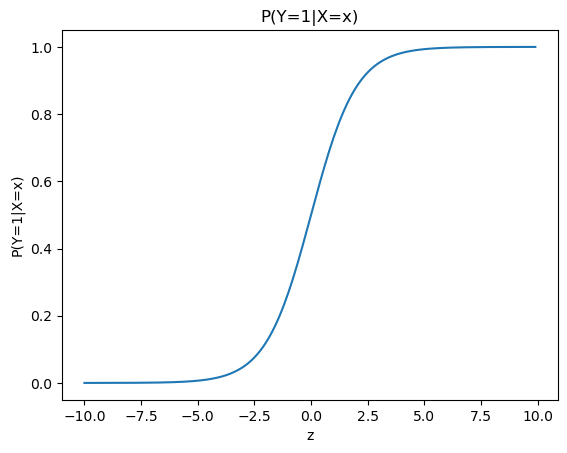

In [4]:
import numpy as np
import matplotlib.pyplot as plt

z_n = np.arange(-10,10,step=0.1)
sig_z = 1/(1+np.exp(-z_n))

plt.figure()
plt.plot(z_n,sig_z)
plt.xlabel('z')
plt.ylabel('P(Y=1|X=x)')
plt.title('P(Y=1|X=x)')
plt.show()

Looking at the sigmoid function,

$$ 0\leq P(Y=1|X=x)\leq 1
$$

If $P(Y=1|X=x) \geq \text{threshold}$, the data vector belongs to class 1 otherwise, it belongs to class 0.

The exact estimation of the logistic regression parameters are obtained using the <b>maximum likelihood estimation method</b> (not covered) leading to the obtention of the $\theta$ parameters that will build the <b>logistic function</b> or <b>classification model<b/>.

<h2>3. Python Implementation</h2>

<b>3.1. Feature/Target extraction and Data Split</b>

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:9]#get features
y = df.iloc[:,[-1]]#get target variable

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)


<b>3.2 Model Building</b>

In [12]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

clf = LogisticRegression() #clf = classification
clf.fit(X_train,y_train) #fit the data: MLE (Maximum Likelhood Estimation method)

profile_x = np.array([6,148,72,35,0,33.6,0.627,50]).reshape(1,-1)
"""
Pregnancies=6
Glucose=148
BloodPressure=72
SkinThickness=35
Insulin=0
BMI=33.6
DiabetesPedigreeFunction=0.627
Age=50
"""

predicted_class = clf.predict(profile_x)
prob_class = clf.predict_proba(profile_x)

print('Predicted_class:',predicted_class[0], ' Probability: P(Y=1|X=x)=',prob_class[0][1])

[[0.29389711 0.70610289]]
Predicted_class: 1  Probability: P(Y=1|X=x)= 0.7061028909371443


<h2>4. Asssessing the Performance of a classification model</h2>

There are several metrics to verify the performance of a classification model starting with the <b>classification accuracy</b> and <b>confusion matrix<b/>.

<h3>4.1 The confusion matrix</h3>

The confusion matrix is a matrix that records the performance of a classification model on several terms.

<img src="media/cm.png" width="500px"/>

<ul>
<li>The <b>True Positive</b> is the number of data observations that had a class of 1 and that were correctly classified as 1.</li>
 <li>The <b>True Negative</b> is the number of data observations that had a class of 0 and that were correctly classified as 0.</li>
    <li>The <b>False Positive</b> is the number of data observations that had a class of 0 and that were wrongly classified as 1.</li>
    <li>The <b>False Negative</b> is the number of data observations that had a class of 1 and that were wrongly classified as 0.</li>
</ul>

<h3>4.2. Classification Accuracy</h3>

The classification accuracy is the proportion of correct predictions made by the model out of all data records.<br/><br/>
$$
 Classification\text{ }Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

<h3>4.3. Python Implementation</h3>

[[1281  158]
 [ 344  431]]


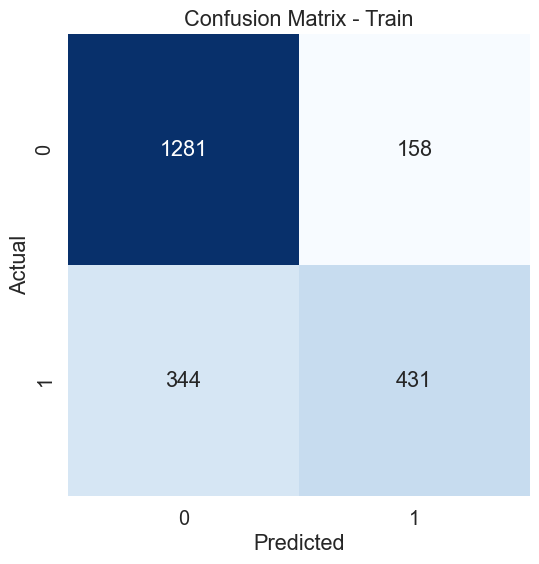

Training-set- classification accuracy: 0.7732610659439928


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_train = clf.predict(X_train)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

class_acc_train = (cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[0][1]+cm_train[1][0]+cm_train[1][1])

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()

print('Training-set- classification accuracy:',class_acc_train)

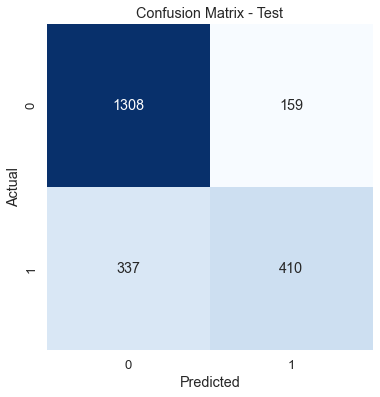

Test-set- classification accuracy: 0.7870036101083032


In [34]:
y_pred_test = clf.predict(X_test)

# Create confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

class_acc_test = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

print('Test-set- classification accuracy:',class_acc_test)

<h2>5. Improving the performance of a model</h2>

Tips to improve the performance of a model:
<ul>
    <li>Normalise or standardise your features</li>
    <li>Perform feature selection</li>
    <li>Hyperparameter tuning</li>
</ul>